**Prediction for Renttherunway and ModCloth Dataset**

In [4]:
import tensorflow as tf
import json
import csv
import pandas as pd

tf.enable_eager_execution()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file_path = '/content/drive/My Drive/'

**Reading Modcloth Dataset.**

In [188]:
# Reading the data from json file
mod_cloth_data = pd.read_json(file_path + 'modcloth_final_data.json', lines=True)
mod_cloth_data.head(20)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


In [0]:
mod_cloth_data.columns = ['item_id','waist', 'size', 'quality' , 'cup_size', 'hips', 'bra_size', 'category','bust', 'height', 'user_name','length', 'fit','user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_text']

Execute the below 4 steps for using **modcloth unbaised data**.

In [187]:
#View the fit data
mod_data = mod_cloth_data[mod_cloth_data.fit  == 'fit'] 
mod_data = mod_data.head(13000)
mod_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN


In [100]:
mod_data_small = mod_cloth_data[mod_cloth_data.fit  == 'small'] 
mod_data_small.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN


In [101]:
mod_data_large = mod_cloth_data[mod_cloth_data.fit  == 'large'] 
mod_data_large.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,NaN,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
18,123373,NaN,15,4.0,d,39.0,36.0,new,NaN,5ft 8in,Carol,just right,large,21605,8.5,NaN,NaN,NaN
20,123373,NaN,18,5.0,dd/e,38.0,36.0,new,NaN,5ft,aunibe7,slightly long,large,42046,NaN,NaN,NaN,NaN
21,123373,NaN,5,5.0,b,NaN,34.0,new,NaN,5ft 7in,dputvin,just right,large,4905,7.0,average,NaN,NaN


In [102]:
#concat all the three dataset
mod_cloth_data = pd.concat([mod_data,mod_data_small,mod_data_large])
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN


**Preprocessing of modcloth data.**

In [0]:
#Code to calculate TF*IDF for the text in “review_text”
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import linear_kernel 
#ds = pd.read_json("modcloth_data.json",lines = True)
#ds['review_text'].head()
#tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
#tfidf_matrix = tf.fit_transform(ds['review_text'])

In [190]:
from sklearn.utils import shuffle
# shuffling the data
mod_cloth_data = shuffle(mod_cloth_data)
mod_cloth_data.head(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
28041,399356,NaN,8,5.0,d,NaN,34.0,sale,NaN,5ft 4in,Hannah S.,just right,fit,635853,NaN,NaN,Great Boho Style,This dress was perfect for my summer boho wedd...
81019,803464,NaN,26,2.0,d,51.0,42.0,outerwear,NaN,5ft 2in,laurenlynn82,just right,fit,269685,NaN,NaN,I like the way it looked,I like the way it looked online way better tha...
31355,407134,NaN,26,3.0,dddd/g,NaN,40.0,new,NaN,5ft 3in,maddiehoskins,just right,small,972353,NaN,NaN,Generally a pretty good s,Generally a pretty good sweaterit gets a lot o...
7082,152702,NaN,8,5.0,d,NaN,32.0,new,NaN,5ft 8in,lauren.main28,just right,fit,544779,NaN,NaN,I read all these reviews,I read all these reviews and I had high expect...
69006,715662,NaN,32,5.0,dd/e,NaN,38.0,bottoms,NaN,5ft 4in,guardgirlieinm,just right,fit,631906,8.5,average,Love these shorts! Will b,Love these shorts! Will buy more for next summer!
12918,169727,NaN,12,3.0,d,NaN,36.0,dresses,NaN,5ft 7in,Marta,just right,fit,45583,NaN,NaN,Very cute. A little narro,Very cute. A little narrow in the chest.
2412,131951,NaN,20,3.0,d,48.0,36.0,new,NaN,5ft 7in,shakespearegal,just right,large,576621,NaN,NaN,NaN,NaN
56209,639328,NaN,20,4.0,dd/e,47.0,40.0,tops,NaN,5ft 1in,saturn71369,slightly long,fit,901931,NaN,NaN,This is my 4th endless po,This is my 4th endless possibilities top and I...
43591,477210,NaN,20,3.0,d,48.0,38.0,tops,NaN,5ft 7in,spitfire.sam,slightly short,large,274701,NaN,NaN,"The material is thin, bit","The material is thin, bit I don't mind that. T..."
32098,407134,NaN,8,2.0,ddd/f,36.0,30.0,new,NaN,5ft 6in,alex_petkus,just right,small,370392,NaN,NaN,So disappointedI joined M,So disappointedI joined ModCloth specifically ...


In [191]:
mod_cloth_data.bra_size = mod_cloth_data.bra_size.fillna(-1.0)
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
28041,399356,NaN,8,5.0,d,NaN,34.0,sale,NaN,5ft 4in,Hannah S.,just right,fit,635853,NaN,NaN,Great Boho Style,This dress was perfect for my summer boho wedd...


In [192]:
#clean dataset for null data
mod_cloth_data.cup_size.fillna('Unknown', inplace=True)
#cloth_data.cup_size = cloth_data.cup_size.astype('category').cat.as_ordered()
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
28041,399356,NaN,8,5.0,d,NaN,34.0,sale,NaN,5ft 4in,Hannah S.,just right,fit,635853,NaN,NaN,Great Boho Style,This dress was perfect for my summer boho wedd...


In [193]:
def convert_to_cms(x):
  if type(x) == type(1.0):
    return
  try:
    return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
  except:
    return (int(x[0])*30.48)

mod_cloth_data.height = mod_cloth_data.height.apply(convert_to_cms)
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
28041,399356,NaN,8,5.0,d,NaN,34.0,sale,NaN,162.56,Hannah S.,just right,fit,635853,NaN,NaN,Great Boho Style,This dress was perfect for my summer boho wedd...


In [194]:
mod_cloth_data.hips = mod_cloth_data.hips.fillna(-2.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
mod_cloth_data.hips = pd.cut(mod_cloth_data.hips, bins, labels=labels)
mod_cloth_data.head(1)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
28041,399356,NaN,8,5.0,d,Unknown,34.0,sale,NaN,162.56,Hannah S.,just right,fit,635853,NaN,NaN,Great Boho Style,This dress was perfect for my summer boho wedd...


In [0]:
mod_missing_rows = mod_cloth_data[mod_cloth_data.height.isnull()].index
mod_cloth_data.drop(mod_missing_rows, axis = 0, inplace=True)

In [196]:
#observing the missing data. This is used to see which features should not be included to train the model
missing_data = pd.DataFrame({'total_missing': mod_cloth_data.isnull().sum(), 'perc_missing': (mod_cloth_data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,78831,95.218022
size,0,0.000000
quality,64,0.077304
cup_size,0,0.000000
hips,0,0.000000
bra_size,0,0.000000
category,0,0.000000
bust,69872,84.396666
height,0,0.000000


In [197]:
#Dropping the unwanted data columns
mod_cloth_data = mod_cloth_data.drop(['waist', 'quality', 'category', 'bust', 'user_name', 'length', 'shoe_size', 'shoe_width' , 'review_summary', 'review_text'], axis=1)
mod_cloth_data.head()

,item_id,size,cup_size,hips,bra_size,height,fit,user_id
28041,399356,8,d,Unknown,34.0,162.56,fit,635853
81019,803464,26,d,XL,42.0,157.48,fit,269685
31355,407134,26,dddd/g,Unknown,40.0,160.02,small,972353
7082,152702,8,d,Unknown,32.0,172.72,fit,544779
69006,715662,32,dd/e,Unknown,38.0,162.56,fit,631906


In [0]:
# Changing the data type in order to consider as a valid feature in tensor flow.
mod_cloth_data['cup_size'] = mod_cloth_data['cup_size'].astype(str)
mod_cloth_data['hips'] = mod_cloth_data['hips'].astype(str)
mod_cloth_data['bra_size'] = mod_cloth_data['bra_size'].astype(int)

In [154]:
mod_cloth_data['fit'] = mod_cloth_data.fit.replace('small' , 0)
mod_cloth_data['fit'] = mod_cloth_data.fit.replace("fit" , 1)
mod_cloth_data['fit'] = mod_cloth_data.fit.replace("large" , 2)
mod_cloth_data.head(1)

,item_id,size,cup_size,hips,bra_size,height,fit,user_id
48578,520945,4,d,Unknown,32,170.18,1,288643


In [0]:
mod_cloth_data['fit_one_hot'] = mod_cloth_data['fit'].str.get_dummies().values.tolist()
mod_cloth_data = mod_cloth_data.drop('fit',axis=1)

In [0]:
# from sklearn.decomposition import PCA
# import numpy as np
# pca = PCA(n_components=len(cloth_data))
# pca.fit(cloth_data)
# cloth_data = np.matmul(cloth_data, pca.components_.T)

**Converting preprocessed data from pandas to tensorflow for multiclass classification.**

In [0]:
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(mod_cloth_data, test_size=0.2)

In [0]:
train, val = train_test_split(train, test_size=0.2)

In [203]:
print(len(train))
print(len(test))
print(len(val))

52276
16337
13070


In [0]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  # Replace 'fit_one_hot' with 'fit' when using SparseCategoricalCrossentropy
  labels = dataframe.pop('fit_one_hot')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
feature_columns = []

In [0]:
#Adding the numeric freatures to the freatures column array.
feature_columns.append(feature_column.numeric_column("height"))
feature_columns.append(feature_column.numeric_column("size"))

In [0]:
bra_size = feature_column.categorical_column_with_vocabulary_list(
      'bra_size', mod_cloth_data.bra_size.unique())

In [0]:
bra_size_one_hot = feature_column.indicator_column(bra_size)
feature_columns.append(bra_size_one_hot)

In [0]:
#converting the categorical data to numeric data using one hot encoding and adding it to the feature columns array
item_id = feature_column.categorical_column_with_vocabulary_list(
      'item_id', mod_cloth_data.item_id.unique())

In [0]:
item_id_one_hot = feature_column.indicator_column(item_id)
feature_columns.append(item_id_one_hot)

In [0]:
cup_size = feature_column.categorical_column_with_vocabulary_list(
      'cup_size', mod_cloth_data.cup_size.unique())

In [0]:
cup_size_one_hot = feature_column.indicator_column(cup_size)
feature_columns.append(cup_size_one_hot)

In [0]:
hips = feature_column.categorical_column_with_vocabulary_list(
      'hips', mod_cloth_data.hips.unique())

In [0]:
hips_one_hot = feature_column.indicator_column(hips)
feature_columns.append(hips_one_hot)

In [0]:
user_id = feature_column.categorical_column_with_vocabulary_list(
      'user_id', mod_cloth_data.user_id.unique())

In [0]:
user_id_one_hot = feature_column.indicator_column(user_id)
feature_columns.append(user_id_one_hot)

Execute the below steps for classifiying labels from features using **tensorflow's DNN Classifier**

In [0]:
#setting the lables i.e the y_train for training and validation set
y_train = train.pop('fit')
y_val = val.pop('fit')

In [0]:
def input_fn(features, labels, training=True, batch_size=512):
    # Convert the inputs to a Dataset and provide input to the pipeline
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle dataset
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [0]:
# train_input_fn = input_fn(train, y_train)
# eval_input_fn = input_fn(val, y_val)

In [175]:

classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    
    hidden_units=[30, 10],
    
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3pe3cmte', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f16cd905b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [177]:
# Trainng the classifier
classifier.train(
    input_fn=lambda: input_fn(train, y_train, training=True),
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3pe3cmte/model.ckpt-0
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3pe3cmte/model.ckpt.
INFO:tensorflow:loss = 1151.8135, step = 1
INFO:tensorflow:global_step/sec: 3.64684
INFO:tensorflow:loss = 422.43042, step = 101 (27.423 sec)
INFO:tensorflow:global_step/sec: 3.84822
INFO:tensorflow:loss = 418.95746, step = 201 (25.986 sec)
INFO:tensorflow:global_step/sec: 3.83714
INFO:tensorflow:loss = 388.5127, step = 301 (26.060 sec)
INFO:tensorflow:global_step/sec: 3.8217
INFO:tensorflow:loss = 410.64404, step = 401 (26.169 sec)
INFO:tensorflow:global_step/sec: 3.80423
INFO:tensorflow:loss = 391.48846, step = 501 (26.285 sec)
INFO:tenso

In [178]:
#evaluating the result
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(val, y_val, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-21T07:18:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3pe3cmte/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-21-07:18:22
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6868401, average_loss = 0.8128922, global_step = 1000, loss = 408.63464
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp3pe3cmte/model.ckpt-1000

Test set accuracy: 0.687



Execute the below steps for classifiying labels from features using **tensorflow's Linear Model**

In [0]:
#function to shuffle the data for traing datasets and adding the dictinary of data and lables as an input to pipeline
def make_input_fn(data_df, num_epochs=10, shuffle=True, batch_size=512):
  def input_function():
    label_df = data_df.pop('fit')
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [0]:
train_input_fn = make_input_fn(train)
eval_input_fn = make_input_fn(val, num_epochs=1, shuffle=False)

In [183]:
#Create a classifier model.
#Train it on train data and then evaluate for test data
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=3)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpawvrth2u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f16cdeed6a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [184]:
eval_test_fn = make_input_fn(test, num_epochs=1, shuffle=False)
result_test = linear_est.evaluate(eval_test_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-21T07:22:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpawvrth2u/model.ckpt-1030
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-21-07:22:42
INFO:tensorflow:Saving dict for global step 1030: accuracy = 0.66444266, average_loss = 0.8021948, global_step = 1030, loss = 409.5455
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1030: /tmp/tmpawvrth2u/model.ckpt-1030


Execute the below steps for classifiying labels from features using **tensorflow keras API Sequential algorithm**

In [0]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
reg = 0.001
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),
  layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),

  # layers.Dense(128, activation='relu'),
  # layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='softmax', name='predictions')
])

In [0]:
batch_size = 512
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [0]:
#compile the model using an optimizer
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # Optimizer
              # Loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [0]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-4),  # Optimizer
              # Loss function to minimize
              loss= tf.keras.losses.CategoricalCrossentropy(),
              # List of metrics to monitor
              metrics= METRICS)

In [223]:
 #fit the model
 history = model.fit(train_ds,
            validation_data=val_ds,
            epochs=10)

Epoch 1/10
103/103 [==============================] - 35s 344ms/step - loss: 1.1210 - tp: 22711.0000 - fp: 20013.0000 - tn: 84539.0000 - fn: 29565.0000 - accuracy: 0.5207 - precision: 0.5316 - recall: 0.4344 - auc: 0.6412 - val_loss: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/10
103/103 [==============================] - 32s 311ms/step - loss: 0.8631 - tp: 35823.0000 - fp: 16447.0000 - tn: 88105.0000 - fn: 16453.0000 - accuracy: 0.6854 - precision: 0.6853 - recall: 0.6853 - auc: 0.7850 - val_loss: 0.8673 - val_tp: 8915.0000 - val_fp: 4146.0000 - val_tn: 21994.0000 - val_fn: 4155.0000 - val_accuracy: 0.6823 - val_precision: 0.6826 - val_recall: 0.6821 - val_auc: 0.7909
Epoch 3/10
103/103 [==============================] - 35s 342ms/step - loss: 0.8574 - tp: 35818.0000 - fp: 16438.0000 - tn: 88114.0000 - fn: 16458.0000 - accurac

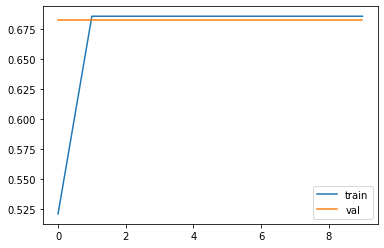

In [224]:
from matplotlib import pyplot



pyplot.plot(history.history['accuracy'],label = 'train')
pyplot.plot(history.history['val_accuracy'],label = 'val')
pyplot.legend()
pyplot.show()

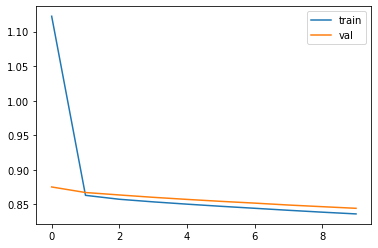

In [225]:
pyplot.plot(history.history['loss'],label = 'train')
pyplot.plot(history.history['val_loss'],label = 'val')
pyplot.legend()
pyplot.show()

In [0]:
for x, y in test_ds.take(1):
  print(model.predict(x))
  print(y)

In [0]:
loss, tp, fp ,tn, fn, accuracy, precision, recall, auc = model.evaluate(test_ds)
print("Accuracy", accuracy)